<font size =5>**Expolratory Data Analysis of COVID-19**</font>

Coronavirus disease (COVID-19) is an infectious disease caused by a new virus. In this notebook, we're going to analyse the famous COVID-19 dataset from Kaggle. We're going to do some exploratory analysis at this stage.

We'll try to answer the following questions:

1) confirmed cases of COVID 
2)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
% matplotlib inline

In [5]:
df = pd.read_csv('C:\\Users\POOJA\Downloads\python\Projects-Radical\EDA\COVID-19\\covid_19_clean_complete.csv')

In [6]:
df.shape

(22270, 8)

From above we can say that we have 22270 row and 8 columns in our dataset

In [7]:
# first we will columns included in the dataset
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [8]:
# Now looking at first few rows from dataset
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [9]:
df.info() #it gives information about datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22270 entries, 0 to 22269
Data columns (total 8 columns):
Province/State    6800 non-null object
Country/Region    22270 non-null object
Lat               22270 non-null float64
Long              22270 non-null float64
Date              22270 non-null object
Confirmed         22270 non-null int64
Deaths            22270 non-null int64
Recovered         22270 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.4+ MB


from this we can see that there are Null values present in column Province/State. Let's replace Nan by '-'.

In [10]:
df.fillna('-',inplace=True)
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,-,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,-,Albania,41.153300,20.168300,1/22/20,0,0,0
2,-,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,-,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,-,Angola,-11.202700,17.873900,1/22/20,0,0,0
5,-,Antigua and Barbuda,17.060800,-61.796400,1/22/20,0,0,0
6,-,Argentina,-38.416100,-63.616700,1/22/20,0,0,0
7,-,Armenia,40.069100,45.038200,1/22/20,0,0,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0,0,0
9,New South Wales,Australia,-33.868800,151.209300,1/22/20,0,0,0


In [11]:
df.describe() # Returns aggregate stats for the dataset.

,Lat,Long,Confirmed,Deaths,Recovered
count,22270.000000,22270.000000,22270.000000,22270.000000,22270.000000
mean,21.433571,22.597991,1493.258958,79.548316,361.045667
std,24.740975,70.571081,14634.162227,890.386249,3545.002486
min,-51.796300,-135.000000,-1.000000,-1.000000,0.000000
25%,7.000000,-19.020800,0.000000,0.000000,0.000000
50%,23.659750,20.921188,2.000000,0.000000,0.000000
75%,41.204400,81.000000,113.000000,1.000000,7.000000
max,71.706900,178.065000,636350.000000,28326.000000,72600.000000


**Find out total no. of confirmed, deaths and deaths cases by Countries**

In [12]:
Country_grouped = df.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum().reset_index()
Country_grouped

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,8228,233,384
1,Albania,8066,408,2569
2,Algeria,28245,3460,5201
3,Andorra,11046,384,995
4,Angola,281,36,40
5,Antigua and Barbuda,324,17,6
6,Argentina,32595,1152,6543
7,Armenia,17283,164,2105
8,Australia,124542,870,21850
9,Austria,277048,4670,73585


After grouping coutries with the total no. of cases of confirmed, deaths and recovered in each country, sort the countries in ascending order so that we wiil get country with maximun no. of cases at first place.

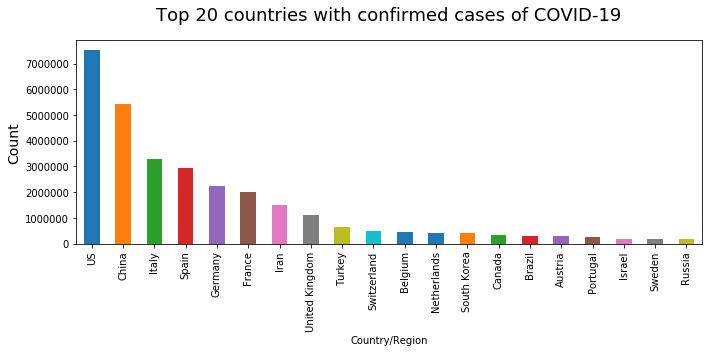

In [15]:
#Plot name of countries with their count of Confirmed COVID-19 cases
f, ax = plt.subplots(1,figsize=(10, 5))
Confirmed_df = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(20).plot(kind='bar',ax=ax)
ax.set_ylabel("Count",size = 14)
ax.set_title("Top 20 countries with confirmed cases of COVID-19",size = 18,pad=20)
plt.tight_layout()

From this we can say that US and china has largest no. of confirmed cases of COVID-19, these two countries are most affected by virus.

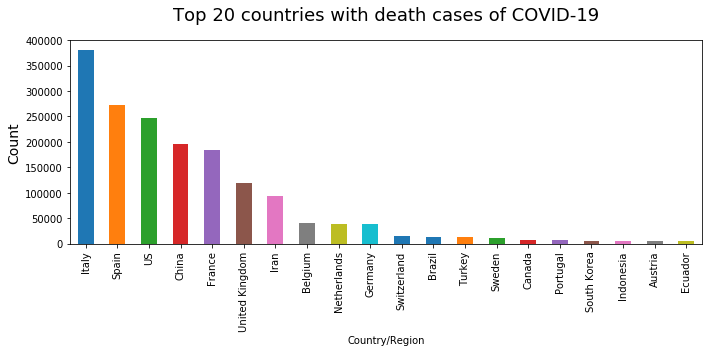

In [17]:
#Plot name of countries with their count of Deaths COVID-19 cases

f, ax2 = plt.subplots(1,figsize=(10, 5))
Deaths_df = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(20).plot(kind='bar',ax=ax2)
ax2.set_ylabel("Count",size = 14)
ax2.set_title("Top 20 countries with death cases of COVID-19",size = 18,pad=20)
plt.tight_layout()

Though highest no. of confirmed cases are from US, but from above we can say that Italy has the largest no. of deaths due to COVID-19 till now.

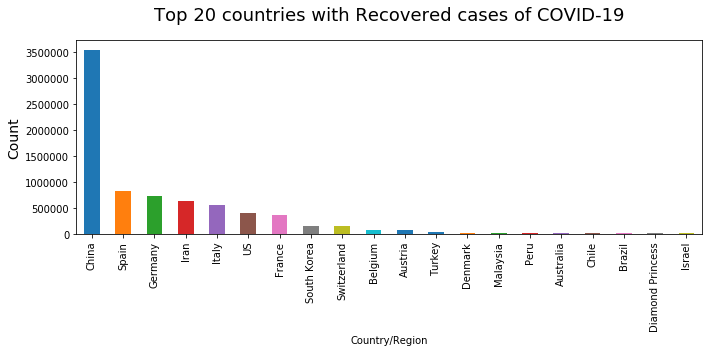

In [20]:
#Plot name of countries with their count of Recovered COVID-19 cases
f, ax3 = plt.subplots(1,figsize=(10, 5))
Recovered_df = df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(20).plot(kind='bar',ax=ax3)
ax3.set_ylabel("Count",size = 14)
ax3.set_title("Top 20 countries with Recovered cases of COVID-19",size = 18,pad=20)
plt.tight_layout()

The largest no. of persons recovered from COVID-19 are from China.

<font size=3>**Now Let's see no of confirmed cases and deaths report data china by province/state**</font>

In [21]:
china = df[df['Country/Region']=='China']
china = china.groupby('Province/State')['Confirmed', 'Deaths','Recovered'].sum().sort_values(by='Confirmed',ascending =False)
china

,Confirmed,Deaths,Recovered
Province/State,,,
Hubei,4455843,188486,2834589
Guangdong,101739,449,73231
Henan,91153,1362,71030
Zhejiang,90161,56,68472
Hunan,73684,250,57896
Anhui,70424,389,54321
Jiangxi,66727,66,51522
Shandong,51490,382,37939
Jiangsu,45168,0,35217


**Find top 5 Province/States of China with maximum no. of confirmed cases reported**

In [22]:
china.head()

,Confirmed,Deaths,Recovered
Province/State,,,
Hubei,4455843,188486,2834589
Guangdong,101739,449,73231
Henan,91153,1362,71030
Zhejiang,90161,56,68472
Hunan,73684,250,57896


**Plot COVID-19 Cases count of US and outside of US datewise**

In [25]:
group = df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths','Recovered'].max()
group = group.reset_index()

US = group[group['Country/Region']=='US'].reset_index()
US = US.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths','Recovered'],
                var_name='Case', value_name='Count')
fig1 = px.bar(US, x="Date", y="Count", color='Case', facet_col="Case",
            title='COVID-19 Cases count US datewise')
fig1.show()

outside_US = group[group['Country/Region']!='US'].groupby('Date').sum().reset_index()
outside_US = outside_US.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig2 = px.bar(outside_US, x="Date", y="Count", color='Case', facet_col="Case",
             title='COVID-19 Cases count outside of US datewise' )
fig2.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

<font size=3>**Univariate analysis(PDF, CDF, Boxplot)**</font>

pdf: [9.92501123e-01 5.29860799e-03 1.52671756e-03 8.98069151e-05
 8.98069151e-05 8.98069151e-05 8.98069151e-05 8.98069151e-05
 8.98069151e-05 1.34710373e-04]
bin_edges: [-1.000000e+00  6.363410e+04  1.272692e+05  1.909043e+05  2.545394e+05
  3.181745e+05  3.818096e+05  4.454447e+05  5.090798e+05  5.727149e+05
  6.363500e+05]
cdf: [0.99250112 0.99779973 0.99932645 0.99941626 0.99950606 0.99959587
 0.99968568 0.99977548 0.99986529 1.        ]


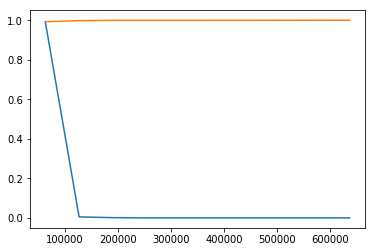

In [26]:
counts, bin_edges = np.histogram(df['Confirmed'], bins=10, density= True)
plt.xlabel= 'Confirmed'
pdf= counts/(sum(counts))
print('pdf:',pdf)
print('bin_edges:',bin_edges)
cdf= np.cumsum(pdf)
print('cdf:',cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)

<font size=3>**Bivariate analysis:**</font>

this gives the relation ship between the two variables , hence its called bivariate analysis.

    Country/Region  Confirmed  Deaths  Recovered
171             US    7522263  247428     405802
36           China    5430791  195829    3548000
84           Italy    3304863  380520     553457


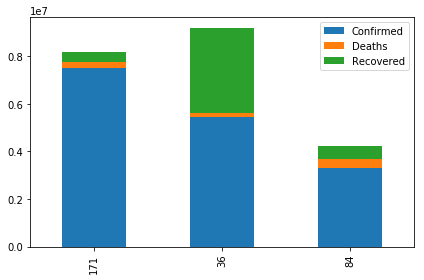

In [28]:
# Plot stacked graph of top 3 countries most affected by COVID-19 and their count
a=Country_grouped.sort_values(by= 'Confirmed',ascending=False).head(3)
print(a)
a.plot(kind='bar',stacked=True)
plt.tight_layout()

Text(0.5,1,'Boxplot of top 3 countries most affected by COVID-19')

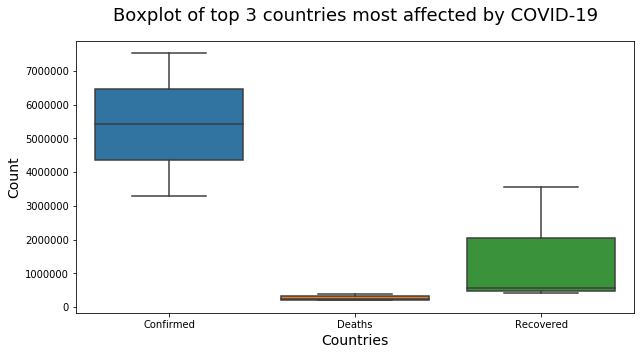

In [29]:
f, ax = plt.subplots(1,figsize=(10, 5))
sns.boxplot(data=a,ax=ax)
ax.set_xlabel("Countries",size = 14)
ax.set_ylabel("Count",size = 14)
ax.set_title("Boxplot of top 3 countries most affected by COVID-19",size = 18,pad=20)

**Using maps feature of plotly to analyze COVID-19 cases according to the geographical location of countries.**`

In [30]:
map1 = px.choropleth(Country_grouped,locations="Country/Region",
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", range_color=[1,7000], 
                    color_continuous_scale="ice", 
                    title='Countries with Confirmed Cases')
map1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
map1.show()

Above map shows Countries with Confirmed Cases which are colored with dark blue to ice blue. Ice blue marked countries have most COVID-19 confirmed cases reported till date. IF you point a cusrsor on a particular region it will show the name of the country and its confirmed cases count.

In [31]:
map2 = px.choropleth(Country_grouped,locations="Country/Region",
                    locationmode='country names', color="Deaths", 
                    hover_name="Country/Region", range_color=[1,7000], 
                    color_continuous_scale="pinkyl", 
                    title='Countries with Deaths Cases')
map2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
map2.show()

Above map shows Countries with Death Cases which are colored with orange to pink. Pink marked countries have most COVID-19 death cases reported till date. IF you point a cusrsor on a particular region it will show the name of the country and its death cases count.

In [32]:
map2 = px.choropleth(Country_grouped,locations="Country/Region",
                    locationmode='country names', color="Recovered", 
                    hover_name="Country/Region", range_color=[1,7000], 
                    color_continuous_scale="Oryel", 
                    title='Countries with Recovered Cases')
map2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
map2.show()

above map shows Countries with recovered Cases which are colored with orange to red. Red marked countries have most COVID-19 recovered cases reported till date. IF you point a cusrsor on a particular region it will show the name of the country and its recovered cases count.